# AI-Powered Customer Segmentation Analysis

This notebook demonstrates the use of artificial intelligence for customer segmentation in a data pipeline.

## Table of Contents
1. [Setup and Data Generation](#setup)
2. [Exploratory Data Analysis](#eda)
3. [Data Preprocessing](#preprocessing)
4. [AI-Based Segmentation](#segmentation)
5. [Segment Analysis and Visualization](#analysis)
6. [Business Insights](#insights)

## 1. Setup and Data Generation {#setup}

In [1]:
# Import required libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add src to path
sys.path.append('../src')

# Import our custom modules
from data_ingestion.data_generator import CustomerDataGenerator
from preprocessing.data_cleaner import DataCleaner
from segmentation.clustering_model import ClusteringModel
from visualization.segment_visualizer import SegmentVisualizer
from pipeline.pipeline_config import PipelineConfig

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("‚úÖ Libraries imported successfully!")

‚úÖ Libraries imported successfully!


In [2]:
# Generate synthetic customer data
data_generator = CustomerDataGenerator(random_seed=42)
raw_data = data_generator.generate_customer_data(n_customers=5000, include_noise=True)

print(f"Generated data shape: {raw_data.shape}")
print(f"Columns: {list(raw_data.columns)}")

Generated data shape: (5000, 23)
Columns: ['customer_id', 'age', 'income', 'region', 'purchase_frequency', 'avg_order_value', 'customer_lifetime', 'total_spend', 'website_visits', 'email_open_rate', 'app_usage', 'electronics_spend_pct', 'clothing_spend_pct', 'home_spend_pct', 'summer_boost', 'holiday_boost', 'recency', 'satisfaction_score', 'support_tickets', 'customer_value_score', 'engagement_score', 'risk_score', 'seasonality_index']


## 2. Exploratory Data Analysis {#eda}

In [3]:
# Display basic information about the dataset
raw_data.head()

customer_id        age        income region  purchase_frequency  \
0  CUST_000000  50.503304  28445.053435  South            1.853589   
1  CUST_000001  36.034050  29736.468198  North            6.176426   
2  CUST_000002  47.565213  16922.579334  North            4.946629   
3  CUST_000003  63.184234  29963.890508  North            7.106671   
4  CUST_000004  35.924224  51235.930865   East            4.294733   

   avg_order_value  customer_lifetime  total_spend  website_visits  \
0       103.452870           8.464693   154.457511        7.396451   
1       118.499348          33.351852  1946.507284        7.295999   
2       100.515933          19.952447   953.649450        8.882440   
3       116.263673          27.906310  1908.474709       16.228142   
4       109.586688          11.114592   541.406537       12.156683   

   email_open_rate  ...  home_spend_pct  summer_boost  holiday_boost  \
0         0.186671  ...        0.120056      0.872647       1.533331   
1         0.360589  ...        0.249386      0.790903       1.303546   
2         0.089786  ...        0.077157      1.259874       1.479776   
3         0.039318  ...        0.258520      1.134871       1.577097   
4         0.436202  ...        0.067405      1.283681       1.538640   

     recency  satisfaction_score  support_tickets  customer_value_score  \
0  -1.577502            6.338479         1.879318              0.236429   
1   7.223286            8.315226         1.154127              0.487954   
2  59.380824            9.316995         4.870957              0.434882   
3  23.317593            5.413630         1.933251              0.417327   
4  28.780749            6.517034        -0.246402              0.313535   

   engagement_score  risk_score  seasonality_index  
0          0.473995    0.272274           1.269057  
1          0.506966    0.144655           1.098489  
2          0.481580    0.353412           1.391815  
3          0.601486    0.312879           1.400207  
4          0.637408    0.122823           1.436656  

[5 rows x 23 columns]

In [4]:
# Data summary statistics
raw_data.describe()

age         income  purchase_frequency  avg_order_value  \
count  5000.000000    5000.000000         5000.000000      5000.000000   
mean     40.052354   41520.394541            5.017416       100.195145   
std      13.971853   21750.213531            2.241173        14.190649   
min      13.750385   12559.261165           -0.400537        58.579739   
25%      29.200269   25680.991650            3.311635        90.201896   
50%      39.738389   35889.683303            4.935670        99.402810   
75%      49.425301   50984.303217            6.289087       109.426614   
max      82.489246  202389.297548           14.955951       152.440153   

       customer_lifetime  total_spend  website_visits  email_open_rate  \
count        5000.000000  5000.000000     5000.000000      4761.000000   
mean           21.504769   902.284729       10.035265         0.286913   
std            18.476742   956.802386        3.138415         0.159669   
min            -3.415798  -316.906797        1.515538        -0.014546   
25%             6.558802   213.837783        7.844528         0.162084   
50%            15.943621   582.176313        9.897835         0.264555   
75%            32.665228  1283.719892       12.102874         0.391748   
max            66.590936  6793.784060       24.445213         0.896342   

         app_usage  electronics_spend_pct  ...  home_spend_pct  summer_boost  \
count  4753.000000            5000.000000  ...     5000.000000   5000.000000   
mean      0.601516               0.283433  ...        0.281356      0.999170   
std       0.491515               0.142903  ...        0.145922      0.202551   
min      -0.216185              -0.017826  ...       -0.027623      0.311705   
25%       0.019327               0.174061  ...        0.171366      0.860704   
50%       0.952768               0.274496  ...        0.266895      0.997656   
75%       1.010518               0.377949  ...        0.377614      1.142843   
max       1.169844               0.822971  ...        0.838389      1.750610   

       holiday_boost      recency  satisfaction_score  support_tickets  \
count    5000.000000  5000.000000         4723.000000      5000.000000   
mean        1.496171    29.995912            6.701237         2.031428   
std         0.298621    30.191225            1.736936         1.425820   
min         0.374392   -10.440744            0.739885        -0.416322   
25%         1.292677     8.646769            5.562785         0.979584   
50%         1.497470    21.429937            6.849446         1.959034   
75%         1.695555    41.105363            8.063998         2.984302   
max         2.772042   233.592766           10.150992         8.962419   

       customer_value_score  engagement_score   risk_score  seasonality_index  
count           4723.000000       5000.000000  5000.000000        5000.000000  
mean               0.354213          0.417708     0.271717           1.297371  
std                0.100018          0.165069     0.116949           0.195084  
min                0.088787          0.057559    -0.000599           0.598491  
25%                0.288201          0.259073     0.188185           1.166666  
50%                0.344673          0.461567     0.263088           1.297328  
75%                0.408848          0.554372     0.347002           1.426693  
max                0.901923          0.796261     0.790097           2.044484  

[8 rows x 21 columns]

In [21]:
# Check for missing values
missing_values = raw_data.isnull().sum()
missing_pct = (missing_values / len(raw_data)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_pct
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

Missing Count  Missing Percentage
customer_value_score            277                5.54
satisfaction_score              277                5.54
app_usage                       247                4.94
email_open_rate                 239                4.78

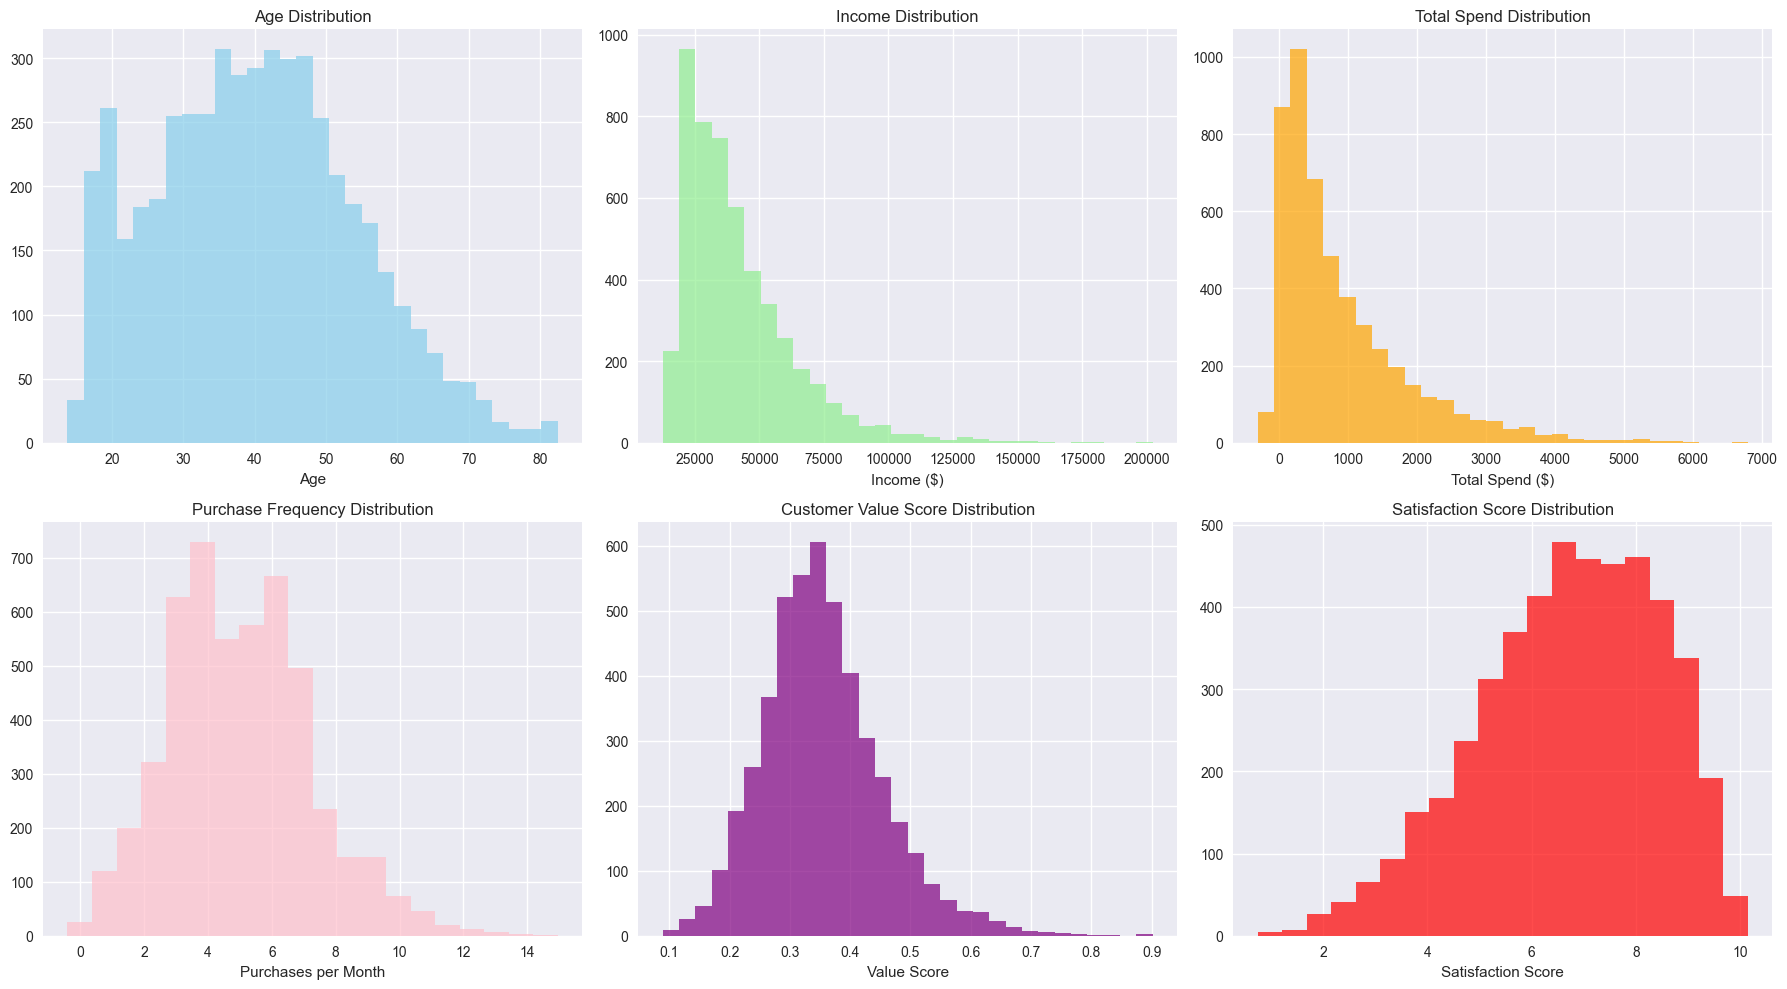

In [22]:
# Visualize key distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Age distribution
axes[0, 0].hist(raw_data['age'], bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')

# Income distribution
axes[0, 1].hist(raw_data['income'], bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Income Distribution')
axes[0, 1].set_xlabel('Income ($)')

# Total spend distribution
axes[0, 2].hist(raw_data['total_spend'], bins=30, alpha=0.7, color='orange')
axes[0, 2].set_title('Total Spend Distribution')
axes[0, 2].set_xlabel('Total Spend ($)')

# Purchase frequency
axes[1, 0].hist(raw_data['purchase_frequency'], bins=20, alpha=0.7, color='pink')
axes[1, 0].set_title('Purchase Frequency Distribution')
axes[1, 0].set_xlabel('Purchases per Month')

# Customer value score
axes[1, 1].hist(raw_data['customer_value_score'], bins=30, alpha=0.7, color='purple')
axes[1, 1].set_title('Customer Value Score Distribution')
axes[1, 1].set_xlabel('Value Score')

# Satisfaction score
axes[1, 2].hist(raw_data['satisfaction_score'].dropna(), bins=20, alpha=0.7, color='red')
axes[1, 2].set_title('Satisfaction Score Distribution')
axes[1, 2].set_xlabel('Satisfaction Score')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing {#preprocessing}

In [5]:
# Initialize data cleaner and clean the data
data_cleaner = DataCleaner()

# Configuration for data cleaning
cleaning_config = {
    'remove_outliers': True,
    'outlier_method': 'iqr',
    'outlier_threshold': 1.5,
    'fill_missing': True,
    'missing_strategy': 'median',
    'normalize_features': True,
    'normalization_method': 'standard'
}

# Clean the data
processed_data = data_cleaner.clean_data(raw_data, cleaning_config)

print(f"Original data shape: {raw_data.shape}")
print(f"Processed data shape: {processed_data.shape}")

Original data shape: (5000, 23)
Processed data shape: (3951, 23)


In [7]:
# Select features for clustering
feature_columns = [
    'age', 'income', 'total_spend', 'avg_order_value', 'purchase_frequency',
    'website_visits', 'email_open_rate', 'customer_value_score', 'engagement_score',
    'risk_score', 'seasonality_index', 'recency'
]

# Filter available features
available_features = [col for col in feature_columns if col in processed_data.columns]
feature_data = processed_data[available_features]

print(f"Selected {len(available_features)} features for clustering:")
print(available_features)

Selected 12 features for clustering:
['age', 'income', 'total_spend', 'avg_order_value', 'purchase_frequency', 'website_visits', 'email_open_rate', 'customer_value_score', 'engagement_score', 'risk_score', 'seasonality_index', 'recency']


## 4. AI-Based Segmentation {#segmentation}

In [8]:
# Initialize clustering model
clustering_model = ClusteringModel()

# Find optimal number of clusters
optimal_k, optimization_metrics = clustering_model.find_optimal_clusters(
    feature_data, method='kmeans', max_clusters=8, min_clusters=2
)

print(f"Optimal number of clusters: {optimal_k}")
print(f"Best silhouette score: {optimization_metrics['silhouette_scores'][optimal_k-2]:.3f}")

Optimal number of clusters: 2
Best silhouette score: 0.112


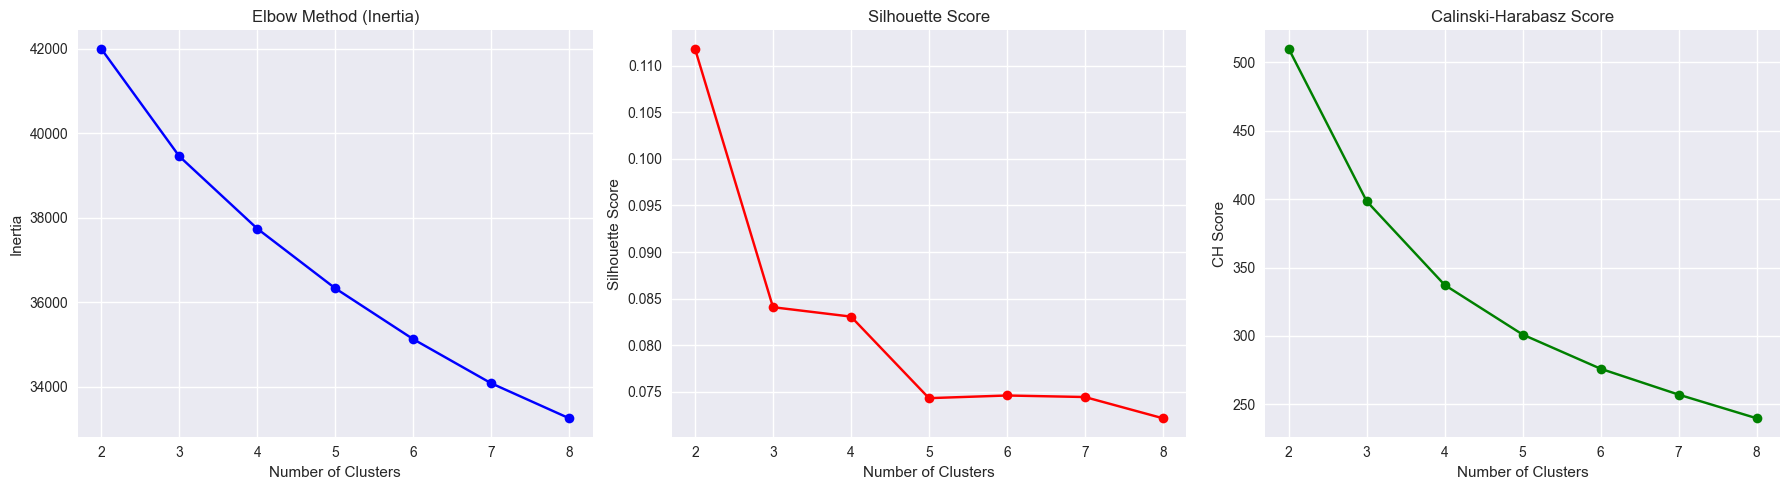

In [10]:
# Visualize optimization metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cluster_range = optimization_metrics['cluster_range']

# Elbow curve (Inertia)
axes[0].plot(cluster_range, optimization_metrics['inertias'], 'bo-')
axes[0].set_title('Elbow Method (Inertia)')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Silhouette scores
axes[1].plot(cluster_range, optimization_metrics['silhouette_scores'], 'ro-')
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Calinski-Harabasz scores
axes[2].plot(cluster_range, optimization_metrics['calinski_scores'], 'go-')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('CH Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Perform K-means clustering with optimal number of clusters
cluster_labels = clustering_model.fit_kmeans(feature_data, n_clusters=optimal_k, random_state=42)

print(f"Clustering completed!")
print(f"Number of segments: {len(set(cluster_labels))}")
print(f"Silhouette score: {clustering_model.metrics['silhouette_score']:.3f}")

# Add cluster labels to processed data (matches cluster labels length)
segmented_data = processed_data.copy()
segmented_data['segment'] = cluster_labels

print(f"\nSegmented data shape: {segmented_data.shape}")
print(f"Cluster labels shape: {len(cluster_labels)}")

Clustering completed!
Number of segments: 2
Silhouette score: 0.112

Segmented data shape: (3951, 24)
Cluster labels shape: 3951


## 5. Segment Analysis and Visualization {#analysis}

In [14]:
# Display segment sizes
segment_counts = pd.Series(cluster_labels).value_counts().sort_index()
segment_percentages = (segment_counts / len(cluster_labels) * 100).round(1)

segment_summary = pd.DataFrame({
    'Segment': [f'Segment {i}' for i in segment_counts.index],
    'Count': segment_counts.values,
    'Percentage': segment_percentages.values
})

print("Segment Distribution:")
print(segment_summary)

Segment Distribution:
     Segment  Count  Percentage
0  Segment 0   1599        40.5
1  Segment 1   2352        59.5


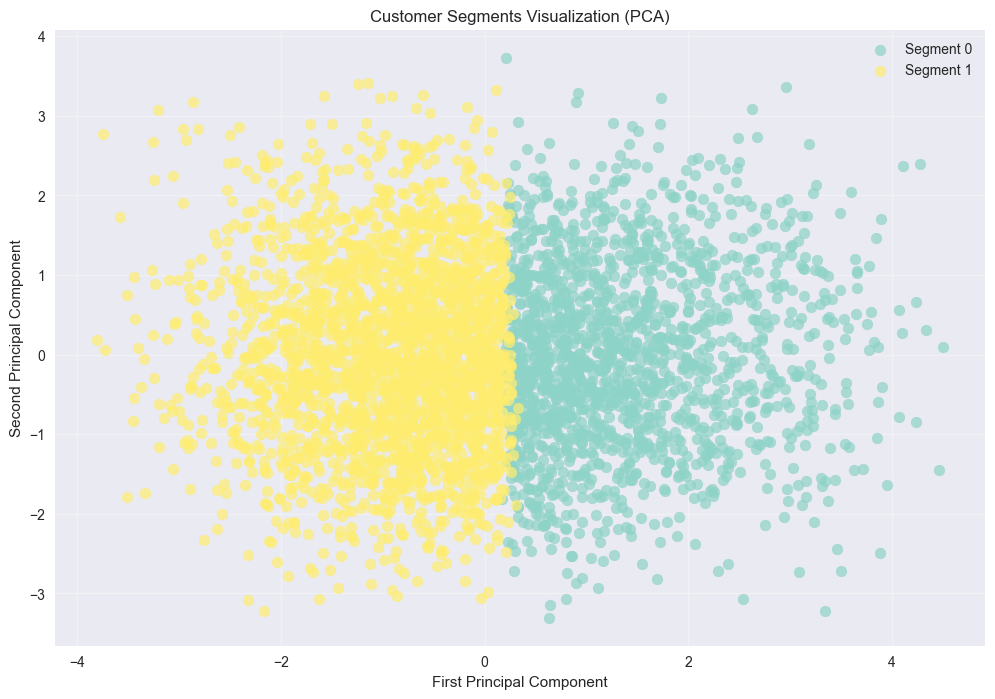

PCA explained variance: 0.290


In [15]:
# Create 2D visualization using PCA
data_2d = clustering_model.reduce_dimensions_for_visualization(feature_data, n_components=2)

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(set(cluster_labels))))

for i, label in enumerate(sorted(set(cluster_labels))):
    mask = cluster_labels == label
    plt.scatter(data_2d[mask, 0], data_2d[mask, 1], 
               c=[colors[i]], s=60, alpha=0.7, label=f'Segment {label}')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Customer Segments Visualization (PCA)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"PCA explained variance: {clustering_model.pca.explained_variance_ratio_.sum():.3f}")

In [18]:
# Analyze segment characteristics
segment_profiles = segmented_data.groupby('segment').agg({
    'age': 'mean',
    'income': 'mean',
    'total_spend': 'mean',
    'avg_order_value': 'mean',
    'purchase_frequency': 'mean',
    'website_visits': 'mean',
    'email_open_rate': 'mean',
    'customer_value_score': 'mean',
    'engagement_score': 'mean',
    'satisfaction_score': 'mean'
}).round(2)

print("Segment Profiles:")
segment_profiles

Segment Profiles:


age  income  total_spend  avg_order_value  purchase_frequency  \
segment                                                                   
0        0.04    0.01         0.77             0.09                0.75   
1       -0.02   -0.01        -0.52            -0.06               -0.51   

         website_visits  email_open_rate  customer_value_score  \
segment                                                          
0                 -0.01            -0.02                  0.90   
1                  0.01             0.02                 -0.61   

         engagement_score  satisfaction_score  
segment                                        
0                     0.0                0.27  
1                    -0.0               -0.19

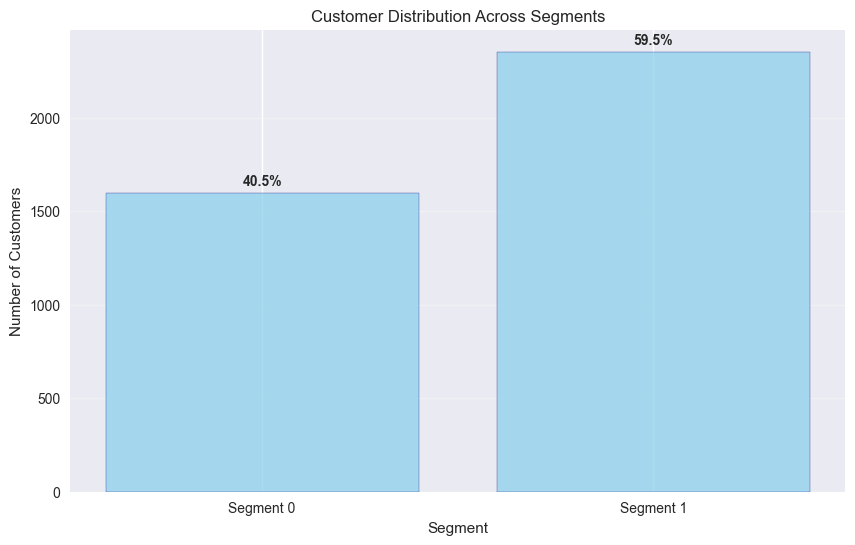

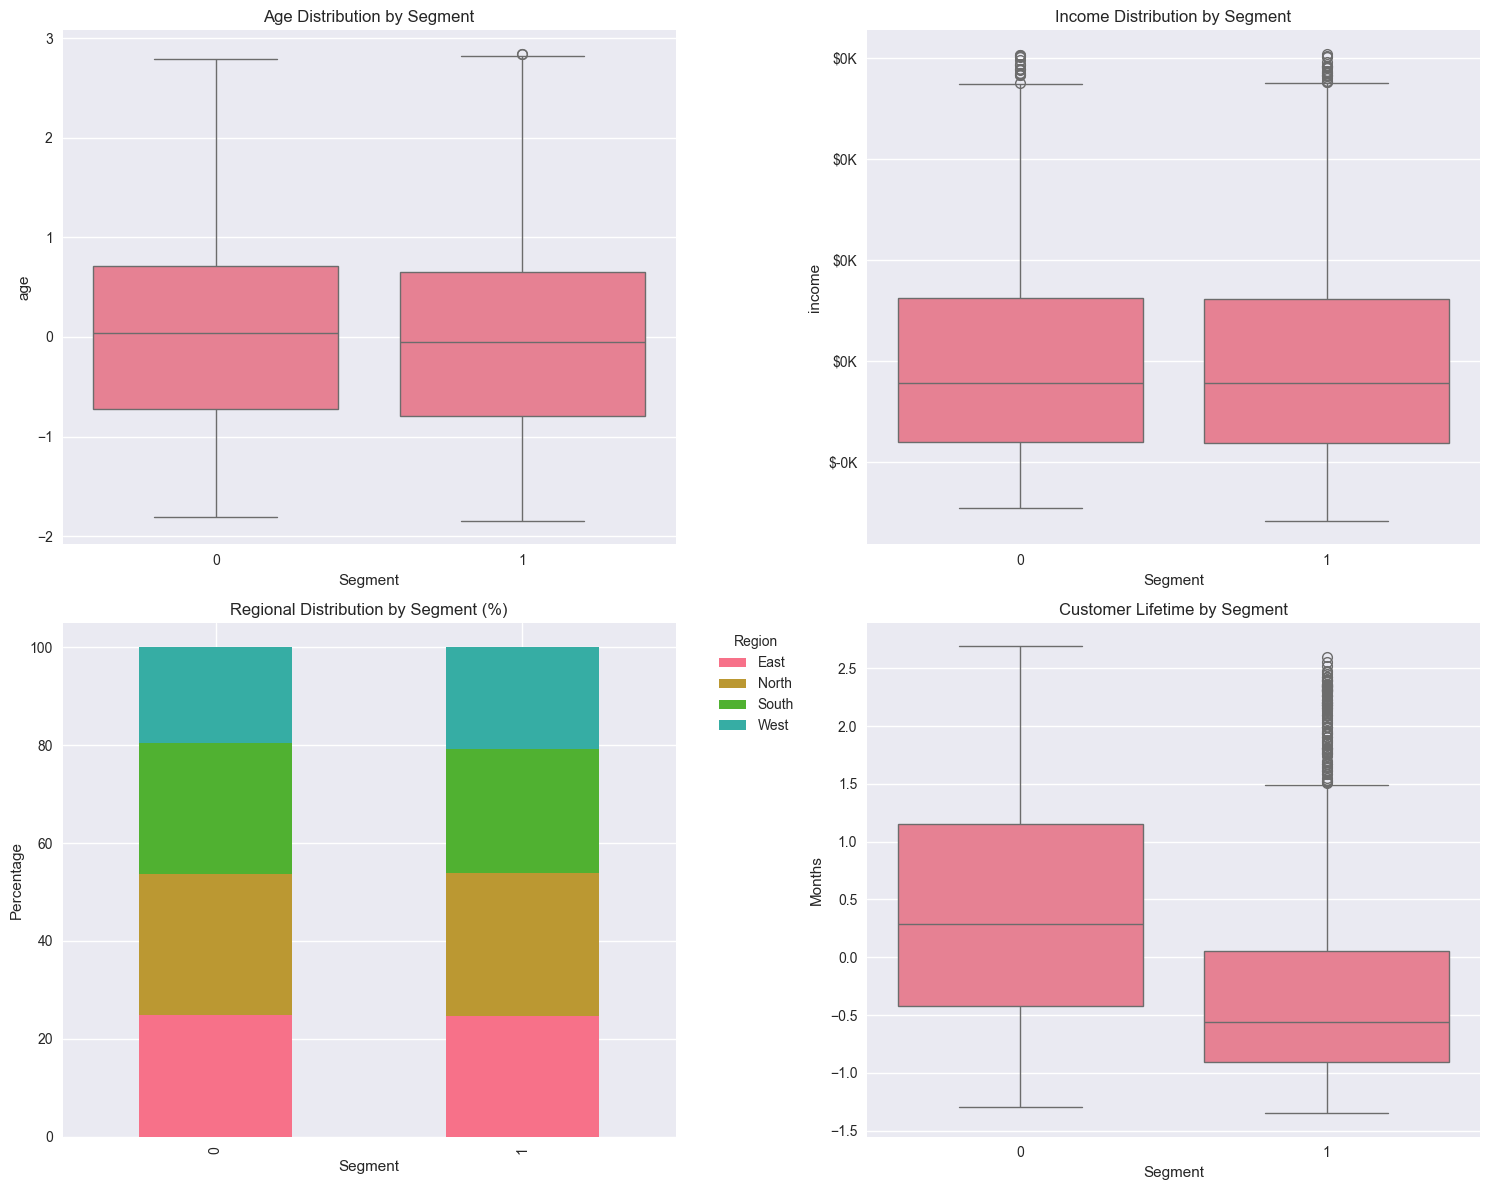

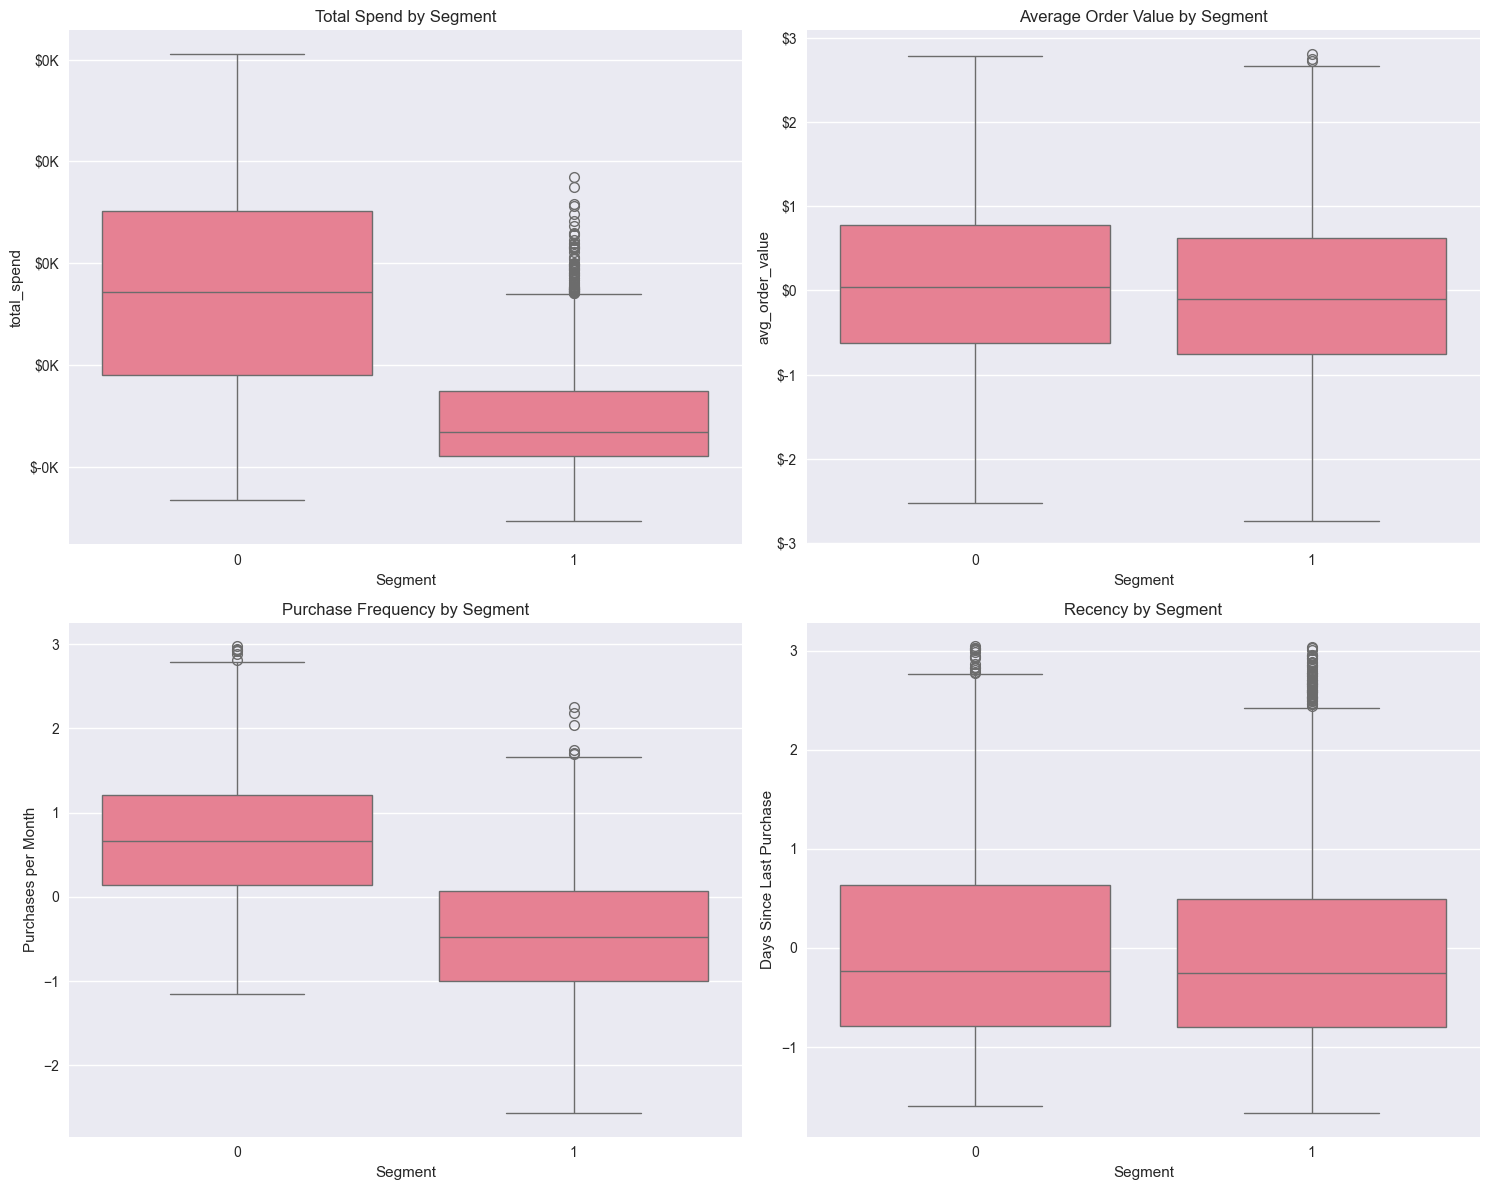

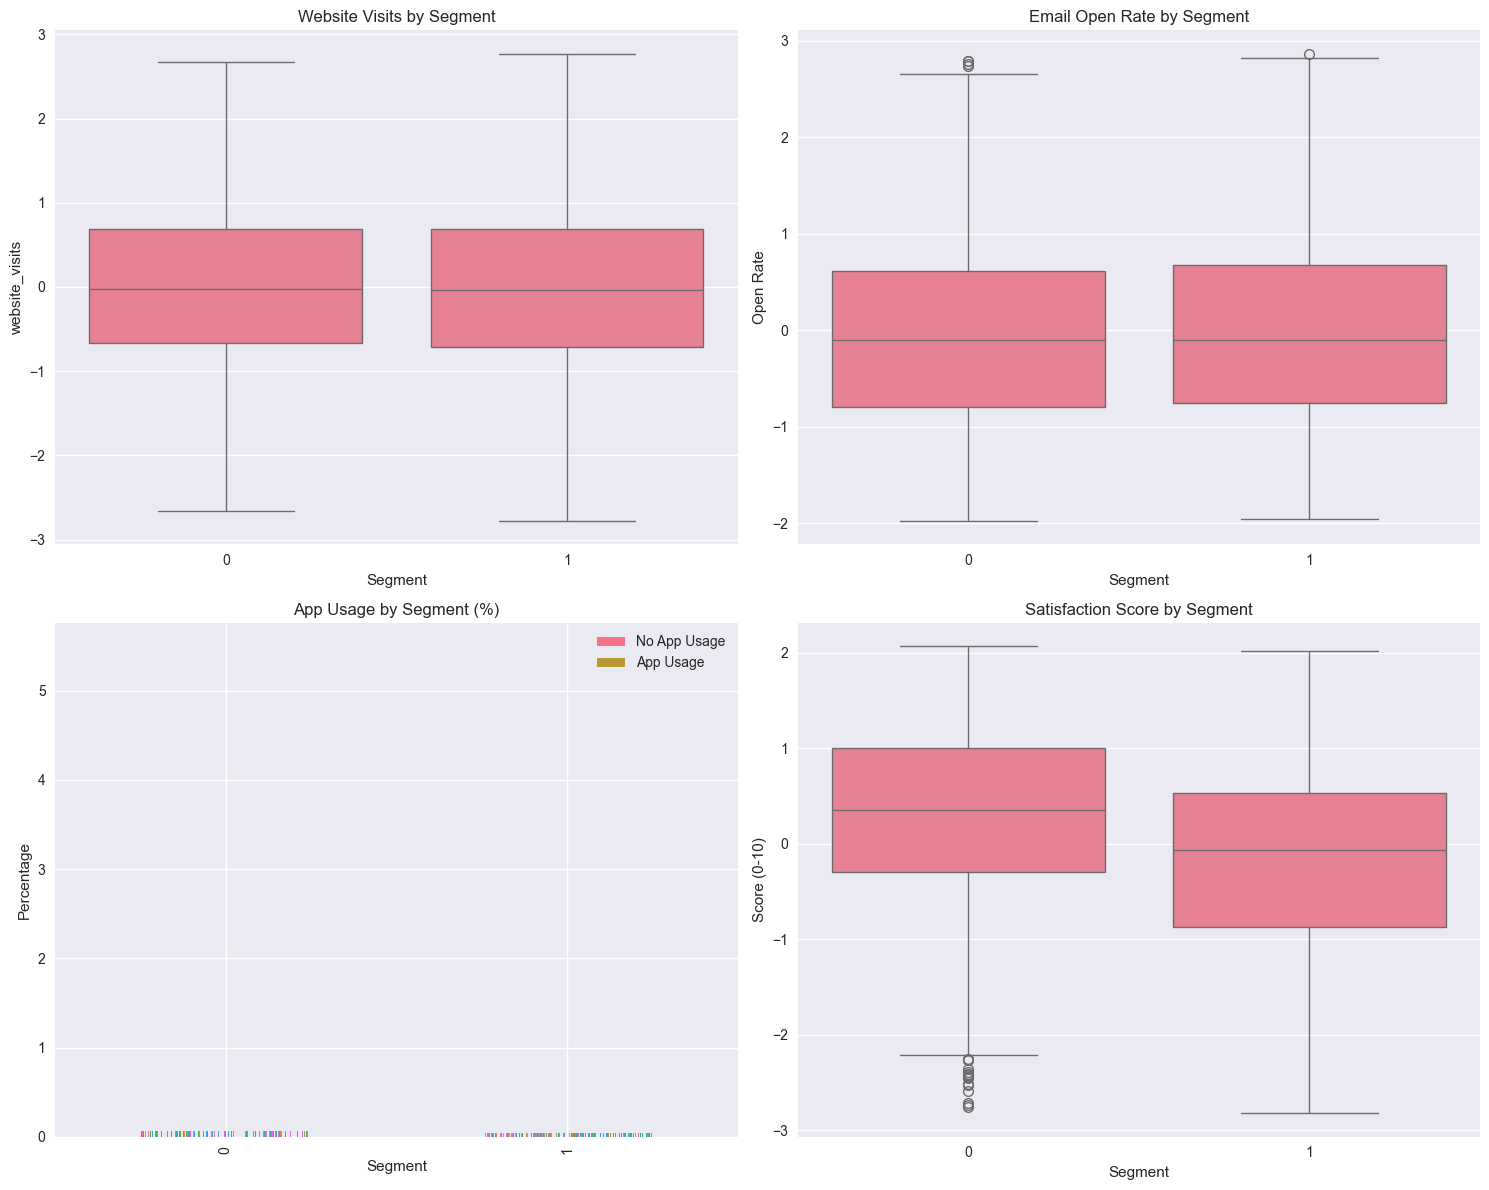

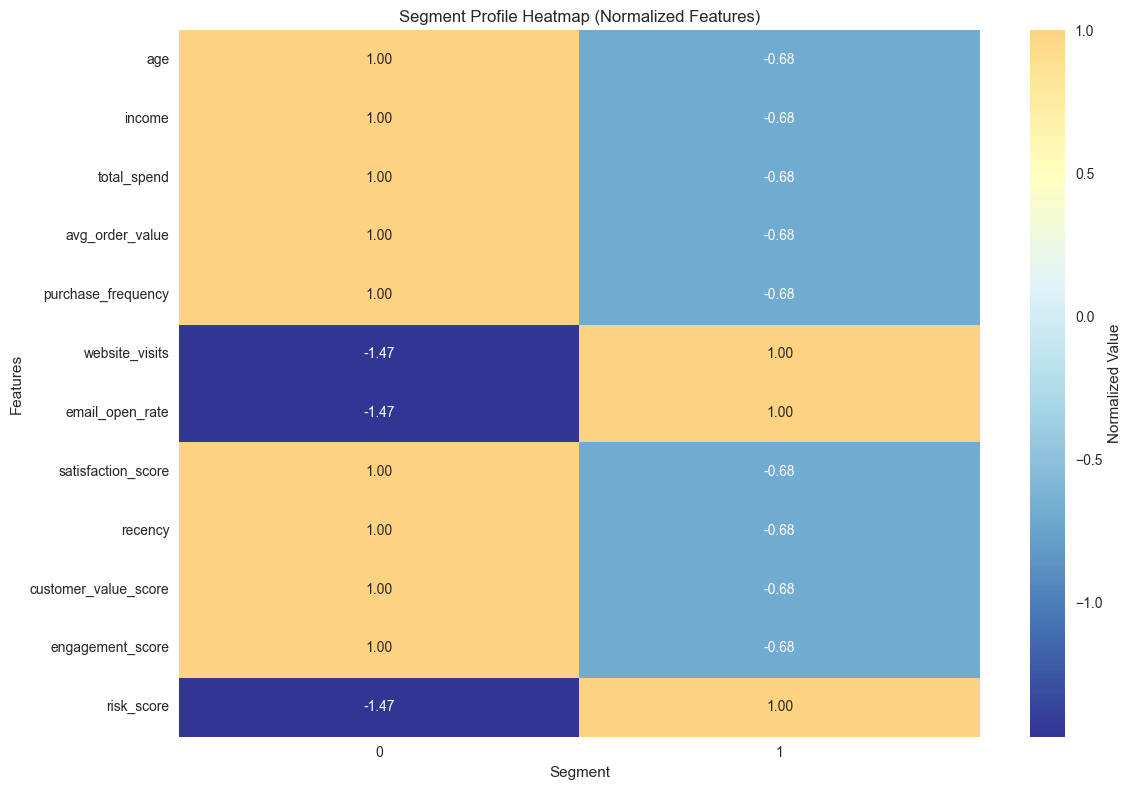

‚úÖ Segment visualizations created!


In [19]:
# Create comprehensive visualizations
visualizer = SegmentVisualizer()

# Segment profile plots
visualizer.create_segment_profile_plots(segmented_data, cluster_labels)

print("‚úÖ Segment visualizations created!")

## 6. Business Insights {#insights}

In [17]:
# Generate business insights for each segment
def generate_segment_insights(segment_data, segment_id):
    """Generate business insights for a segment."""
    insights = []
    
    avg_spend = segment_data['total_spend'].mean()
    avg_frequency = segment_data['purchase_frequency'].mean()
    avg_value = segment_data['avg_order_value'].mean()
    avg_age = segment_data['age'].mean()
    avg_satisfaction = segment_data['satisfaction_score'].mean()
    
    # Spending insights
    if avg_spend > segmented_data['total_spend'].quantile(0.75):
        insights.append("üî• High-value customers with significant spending power")
    elif avg_spend < segmented_data['total_spend'].quantile(0.25):
        insights.append("üí∞ Price-sensitive customers requiring value propositions")
    
    # Frequency insights
    if avg_frequency > segmented_data['purchase_frequency'].median():
        insights.append("üõí Frequent shoppers with high engagement")
    else:
        insights.append("‚è±Ô∏è Occasional shoppers needing engagement strategies")
    
    # Age insights
    if avg_age < 30:
        insights.append("üåü Young demographic, likely tech-savvy")
    elif avg_age > 50:
        insights.append("üë• Mature demographic, values reliability")
    
    # Satisfaction insights
    if avg_satisfaction > 7:
        insights.append("üòä Highly satisfied, good for referrals")
    elif avg_satisfaction < 5:
        insights.append("‚ö†Ô∏è Low satisfaction, needs immediate attention")
    
    return insights

# Generate insights for each segment
print("üéØ BUSINESS INSIGHTS BY SEGMENT")
print("=" * 50)

for segment_id in sorted(segmented_data['segment'].unique()):
    segment_data = segmented_data[segmented_data['segment'] == segment_id]
    size = len(segment_data)
    percentage = (size / len(segmented_data)) * 100
    
    print(f"\nüìä SEGMENT {segment_id}")
    print(f"Size: {size:,} customers ({percentage:.1f}%)")
    print(f"Avg Spend: ${segment_data['total_spend'].mean():,.0f}")
    print(f"Avg Age: {segment_data['age'].mean():.0f} years")
    print(f"Satisfaction: {segment_data['satisfaction_score'].mean():.1f}/10")
    
    insights = generate_segment_insights(segment_data, segment_id)
    print("\nKey Insights:")
    for insight in insights:
        print(f"  ‚Ä¢ {insight}")
    
    print("-" * 30)

üéØ BUSINESS INSIGHTS BY SEGMENT

üìä SEGMENT 0
Size: 1,599 customers (40.5%)
Avg Spend: $1
Avg Age: 0 years
Satisfaction: 0.3/10

Key Insights:
  ‚Ä¢ üî• High-value customers with significant spending power
  ‚Ä¢ üõí Frequent shoppers with high engagement
  ‚Ä¢ üåü Young demographic, likely tech-savvy
  ‚Ä¢ ‚ö†Ô∏è Low satisfaction, needs immediate attention
------------------------------

üìä SEGMENT 1
Size: 2,352 customers (59.5%)
Avg Spend: $-1
Avg Age: -0 years
Satisfaction: -0.2/10

Key Insights:
  ‚Ä¢ ‚è±Ô∏è Occasional shoppers needing engagement strategies
  ‚Ä¢ üåü Young demographic, likely tech-savvy
  ‚Ä¢ ‚ö†Ô∏è Low satisfaction, needs immediate attention
------------------------------


In [20]:
# Summary statistics and recommendations
print("üìà OVERALL SEGMENTATION SUMMARY")
print("=" * 40)
print(f"Total Customers Analyzed: {len(segmented_data):,}")
print(f"Number of Segments: {len(set(cluster_labels))}")
print(f"Segmentation Quality (Silhouette Score): {clustering_model.metrics['silhouette_score']:.3f}")

# Top performing segment
segment_value = segmented_data.groupby('segment')['total_spend'].mean()
top_segment = segment_value.idxmax()
print(f"\nüèÜ Highest Value Segment: Segment {top_segment}")
print(f"   Average Spend: ${segment_value[top_segment]:,.0f}")

# Largest segment
largest_segment = segmented_data['segment'].value_counts().idxmax()
largest_size = segmented_data['segment'].value_counts().max()
print(f"\nüë• Largest Segment: Segment {largest_segment}")
print(f"   Size: {largest_size:,} customers ({largest_size/len(segmented_data)*100:.1f}%)")

print("\n‚úÖ Segmentation analysis completed successfully!")

üìà OVERALL SEGMENTATION SUMMARY
Total Customers Analyzed: 3,951
Number of Segments: 2
Segmentation Quality (Silhouette Score): 0.112

üèÜ Highest Value Segment: Segment 0
   Average Spend: $1

üë• Largest Segment: Segment 1
   Size: 2,352 customers (59.5%)

‚úÖ Segmentation analysis completed successfully!
